In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [100]:
travel_time_data = pd.read_csv('travel_time_train_data.csv')

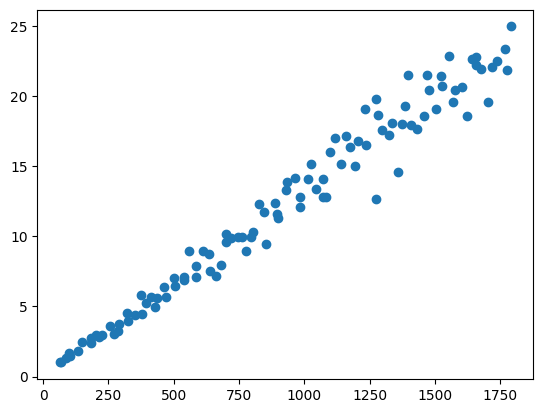

In [101]:
plt.scatter(x=travel_time_data['distance'], y=travel_time_data[' travel_time'])
plt.show()

In [102]:
train_data, test_data = train_test_split(travel_time_data, test_size=0.2, random_state=42)

In [103]:
x_train=train_data['distance'].to_numpy()
y_train=train_data[' travel_time'].to_numpy()
x_test=test_data['distance'].to_numpy()
y_test=test_data[' travel_time'].to_numpy()
x_train = x_train.reshape((-1,1))
x_test = x_test.reshape((-1,1))

In [104]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

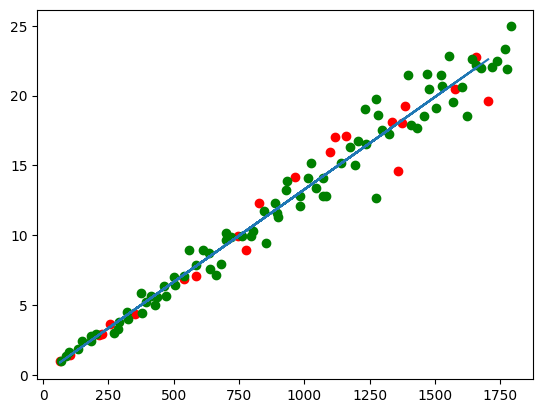

In [105]:
y_test_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)
plt.scatter(x_test,y_test,c='red')
plt.scatter(x_train,y_train,c='green')

plt.plot(x_test,y_test_predict)

In [106]:
train_mse = mse(y_train, y_train_predict, squared=True)
test_mse = mse(y_test, y_test_predict, squared=True)
print(f'{train_mse = }, {test_mse = }')

train_mse = 1.291333613680015, test_mse = 1.7584179318753863


In [107]:
a = model.intercept_
b = model.coef_
print(f'{a = }, {b = }')

a = 0.029954050707852176, b = array([0.01324204])


In [112]:
travel_time_test = pd.read_csv('travel_time_test.csv')
X_test = travel_time_test['distance'].to_numpy()
X_test = X_test.reshape(-1,1)
Y_test_predict = model.predict(X_test)
header = f"X_test\tY_test_predicted"
print(header, '\n', '-'*len(header), sep='')
for j in range(10):
    i = np.random.randint(0, len(y_test))
    print(f"{X_test[i]}\t{int(Y_test_predict[i])}")

X_test	Y_test_predicted
-----------------------
[431.64]	5
[551.39]	7
[332.43]	4
[123.5]	1
[263.5]	3
[263.5]	3
[515.77]	6
[64.2]	0
[431.64]	5
[156.52]	2


In [113]:
np.savetxt('travel_time_predict.csv', Y_test_predict, 
           header='travel_time', 
           delimiter=',', 
           fmt='%.2f', 
           comments='')